### 1️⃣ Import Required Libraries

In [2]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from PIL import Image

import warnings
warnings.filterwarnings("ignore")


#links for the dataset(https://www.kaggle.com/datasets/magantirajasri/cattle-diseases-dataset)

### 2️⃣ Load & Organize the Dataset

In [2]:
# Define dataset paths
dataset_path = "dataset"
train_path = os.path.join(dataset_path, "Train")
test_path = os.path.join(dataset_path, "Test")

In [3]:
# Define class names
classes = ["Foot_and_mouth", "Lumpy", "Normal"]

# Function to count images in each class
def count_images_in_folders(base_path):
    for class_name in classes:
        class_path = os.path.join(base_path, class_name)
        num_images = len(os.listdir(class_path))
        print(f"{class_name}: {num_images} images")

# Count images in training set
print("Training Dataset:")
count_images_in_folders(train_path)

# Count images in test set
print("\nTest Dataset:")
count_images_in_folders(test_path)

Training Dataset:
Foot_and_mouth: 80 images
Lumpy: 131 images
Normal: 214 images

Test Dataset:
Foot_and_mouth: 55 images
Lumpy: 178 images
Normal: 364 images


In [4]:
# Define dataset paths
dataset_path = "dataset"
train_path = os.path.join(dataset_path, "Train")
test_path = os.path.join(dataset_path, "Test")

# Define class names
classes = ["Foot_and_mouth", "Lumpy", "Normal"]

# Target image size
IMG_SIZE = (224, 224)  # Standard size for deep learning models

In [5]:
def resize_images(base_path, target_size=IMG_SIZE):
    for class_name in classes:
        class_dir = os.path.join(base_path, class_name)
        if not os.path.exists(class_dir):
            continue
        
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            try:
                img = Image.open(img_path).convert("RGB")  # Convert to RGB
                img = img.resize(target_size)
                img.save(img_path, "JPEG")  # Specify format
            except Exception as e:
                print(f"Error processing {img_name}: {e}")


In [6]:
import os
print(os.listdir("dataset/Train"))  # List available classes

['Foot_and_mouth', 'Lumpy', 'Normal']


### Image Resizing

In [7]:
from PIL import Image, UnidentifiedImageError  # Import error handling

def resize_images(base_path, target_size=IMG_SIZE):
    for class_name in classes:
        class_dir = os.path.join(base_path, class_name)
        
        if not os.path.exists(class_dir):
            print(f"Skipping missing directory: {class_dir}")
            continue
        
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            
            if os.path.isdir(img_path):  # Skip directories
                continue
            
            try:
                with Image.open(img_path) as img:
                    img = img.convert("RGB")  # Convert to RGB
                    img = img.resize(target_size)
                    img.save(img_path, "JPEG")  # Save as JPEG format
            except UnidentifiedImageError:
                print(f"Skipping corrupted or invalid image: {img_name}")
            except Exception as e:
                print(f"Error processing {img_name}: {e}")

# Run the function
resize_images(train_path)
resize_images(test_path)

print("Image resizing completed.")


Image resizing completed.


### Data visualization

#### Load and Display a "Foot and Mouth" Image

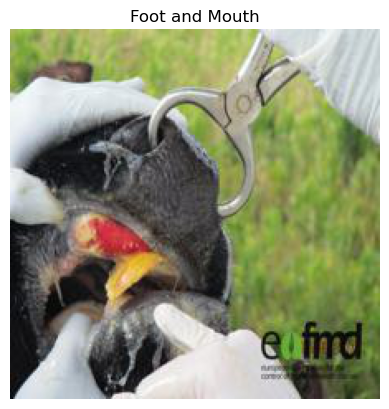

In [8]:
# Select an image from the "Foot and Mouth" class
foot_mouth_image_path = os.path.join(train_path, "Foot_and_mouth", os.listdir(os.path.join(train_path, "Foot_and_mouth"))[0])

# Load and display the image
img = Image.open(foot_mouth_image_path)
plt.imshow(img)
plt.title("Foot and Mouth")
plt.axis("off")
plt.show()

##### Load and Display a "Lumpy" Image

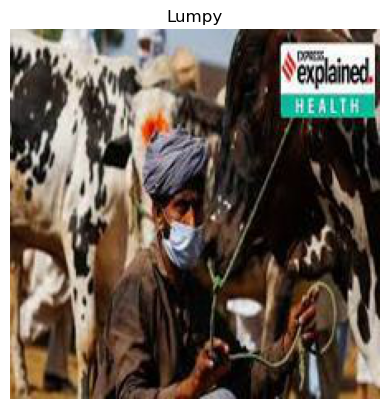

In [9]:
# Select an image from the "Lumpy" class
lumpy_image_path = os.path.join(train_path, "Lumpy", os.listdir(os.path.join(train_path, "Lumpy"))[0])

# Load and display the image
img = Image.open(lumpy_image_path)
plt.imshow(img)
plt.title("Lumpy")
plt.axis("off")
plt.show()

#### Load and Display a "Normal" Image

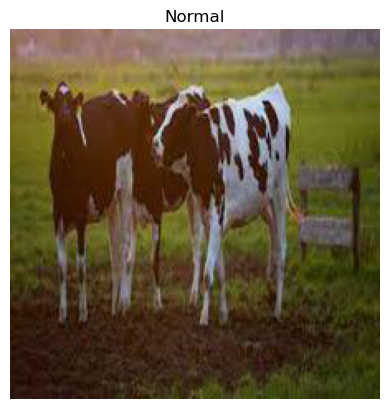

In [10]:
# Select an image from the "Normal" class
normal_image_path = os.path.join(train_path, "Normal", os.listdir(os.path.join(train_path, "Normal"))[0])

# Load and display the image
img = Image.open(normal_image_path)
plt.imshow(img)
plt.title("Normal")
plt.axis("off")
plt.show()

Before normalization, there are a few additional visualizations you might want to consider to better understand your dataset. Here are some ideas and the corresponding code:

1. Visualize Image Dimensions
This helps you check the dimensions of your images to ensure they are consistent before resizing.

2. Visualize Image Distribution (e.g., histogram of pixel values)
You can visualize the pixel value distribution for each class to get a sense of image intensity.

3. Visualize Augmentation Effects
If you apply augmentations, you can visualize how images change after augmentation (e.g., rotated, flipped, zoomed).


#### Visualize Image Dimensions

Image Dimensions: (224, 224) (Width, Height)


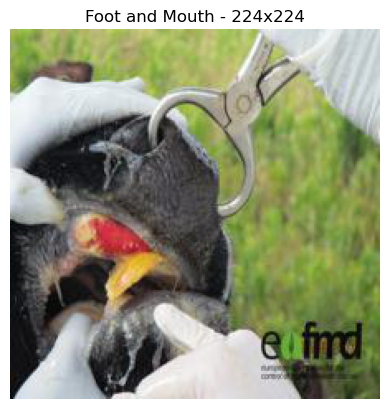

In [11]:
# Select an image from the "Foot and Mouth" class
foot_mouth_image_path = os.path.join(train_path, "Foot_and_mouth", os.listdir(os.path.join(train_path, "Foot_and_mouth"))[0])

# Load the image and check its dimensions
img = Image.open(foot_mouth_image_path)
print(f"Image Dimensions: {img.size} (Width, Height)")

# Display the image with its dimensions
plt.imshow(img)
plt.title(f"Foot and Mouth - {img.size[0]}x{img.size[1]}")
plt.axis("off")
plt.show()

#### Visualize Pixel Value Distribution (Histogram)

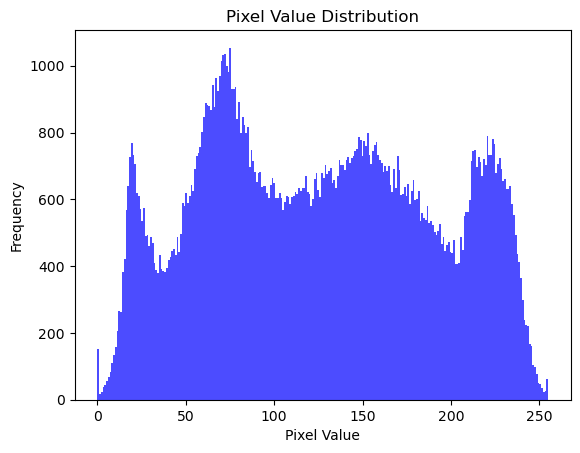

In [12]:
# Load the image and convert to numpy array for pixel value analysis
img = Image.open(foot_mouth_image_path)
img_array = np.array(img)

# Plot histogram of pixel values
plt.hist(img_array.ravel(), bins=256, color='blue', alpha=0.7)
plt.title("Pixel Value Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

#### Visualize Augmentation Effects 

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator with augmentation parameters
train_datagen_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


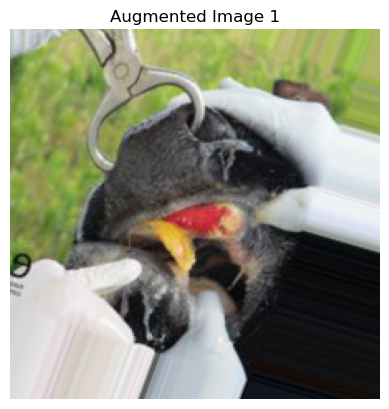

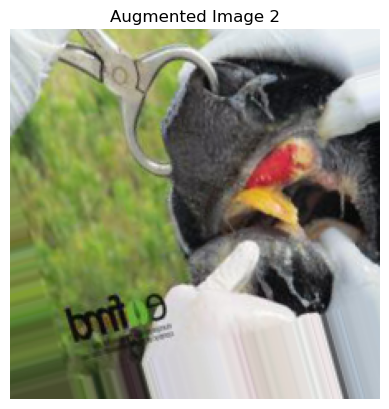

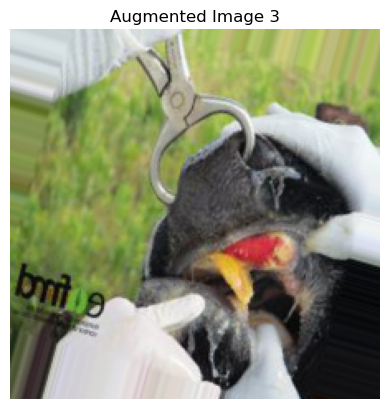

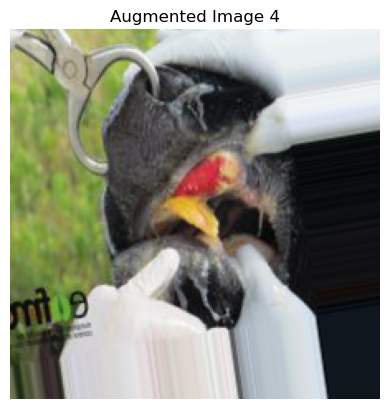

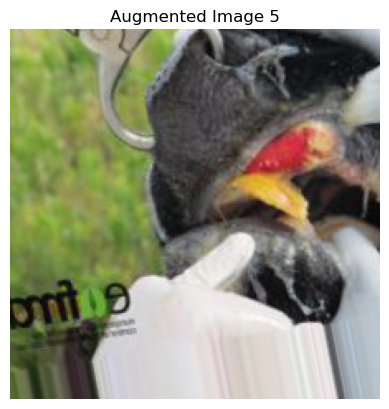

In [14]:
# Convert image to numpy array and reshape for augmentation
img_array = np.array(img).reshape((1, *img.size, 3))  # Reshape for augmentation

# Apply augmentation
augmented_images = train_datagen_aug.flow(img_array, batch_size=1)

# Display augmented images
for i in range(5):  # Show 5 augmented versions
    augmented_image = next(augmented_images)  # Use 'next()' for iteration
    plt.imshow(augmented_image[0].astype('uint8'))
    plt.title(f"Augmented Image {i+1}")
    plt.axis("off")
    plt.show()

### Data preprocessing

In [15]:
import hashlib

#### Function to Compute Image Hash

In [16]:
def image_hash(image_path):
    """
    Compute a hash for an image to detect duplicates.
    Uses the MD5 hash of the image's pixel values.
    """
    with Image.open(image_path) as img:
        # Convert image to grayscale to reduce noise
        img = img.convert('L')
        # Resize image to a smaller size for faster processing
        img = img.resize((8, 8))
        # Convert image to numpy array and compute the hash
        img_array = np.array(img)
        diff = img_array > img_array.mean()  # Compute hash based on pixel difference
        return hashlib.md5(diff.tobytes()).hexdigest()

In [17]:
def check_duplicates(image_dir):
    """
    Check for duplicate images in a directory using image hashes.
    """
    hashes = set()  # Store image hashes
    duplicates = []  # Store paths of duplicate images
    
    # Iterate through all images in the directory
    for class_name in os.listdir(image_dir):
        class_path = os.path.join(image_dir, class_name)
        if os.path.isdir(class_path):  # Check if it's a directory
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                
                # Skip non-image files or hidden files
                if os.path.isdir(img_path) or not img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                    continue
                
                img_hash = image_hash(img_path)
                
                # If the hash already exists, it's a duplicate
                if img_hash in hashes:
                    duplicates.append(img_path)
                else:
                    hashes.add(img_hash)
    
    return duplicates

In [18]:
# Define the path to the training dataset
train_path = "dataset/Train"

# Check for duplicates in the training dataset
duplicates = check_duplicates(train_path)

if duplicates:
    print("Found the following duplicate images:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No duplicates found.")

No duplicates found.


##### Delete Duplicate Images

In [19]:
def delete_duplicates(duplicates):
    """
    Delete duplicate images from the dataset.
    """
    for duplicate in duplicates:
        try:
            os.remove(duplicate)  # Remove the duplicate image file
            print(f"Deleted: {duplicate}")
        except Exception as e:
            print(f"Error deleting {duplicate}: {e}")

In [20]:
# Run the delete duplicates function
delete_duplicates(duplicates)

In [21]:
# Run the duplicate check again after deleting duplicates
duplicates = check_duplicates(train_path)

if duplicates:
    print("Found the following duplicate images:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No duplicates found.")

No duplicates found.


### Convert Grayscale to RGB

In [22]:
import random

In [23]:
# Function to convert grayscale to RGB (if necessary)
def convert_grayscale_to_rgb(img):
    if img.mode != 'RGB':  # If the image is not already RGB
        img = img.convert('RGB')  # Convert grayscale (L) to RGB
    return img

In [24]:
# Function to preprocess and visualize images
def preprocess_image(img_path):
    img = Image.open(img_path)
    
    # Resize image
    img = img.resize((224, 224))
    
    # Convert grayscale to RGB if necessary
    img = convert_grayscale_to_rgb(img)
    
    # Convert image to array
    img_array = np.array(img)
    
    # Normalize image
    img_array = img_array / 255.0  # Normalize to [0, 1]
    
    # Visualize the preprocessed image
    plt.imshow(img_array)
    plt.title(f"Image Mode After Preprocessing: {img.mode}")
    plt.axis("off")
    plt.show()
    
    # Check the shape to ensure it has 3 channels
    print(f"Image Shape: {img_array.shape}")
    
    return img_array

In [25]:
# Function to process a random subset of images in a directory
def process_random_images(directory_path, num_images=5):
    # Get a list of all image files in the directory (including subdirectories)
    image_files = []
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))
    
    # Randomly select 'num_images' from the list
    selected_images = random.sample(image_files, min(num_images, len(image_files)))
    
    # Process the selected images
    for img_path in selected_images:
        print(f"Processing: {img_path}")
        preprocess_image(img_path)

In [26]:
# Example Usage
directory_path = "/dataset/Train"  # Example directory
process_random_images(directory_path, num_images=10)  # Process 5 random images

### Normalization (Min-Max Scaling) Code:

In [27]:
# Function to preprocess and normalize image
def preprocess_and_normalize_image(img_path):
    if os.path.exists(img_path):  # Check if the file exists
        img = Image.open(img_path)
        
        # Resize image
        img = img.resize((224, 224))
        
        # Convert grayscale to RGB if necessary
        img = convert_grayscale_to_rgb(img)
        
        # Convert image to array
        img_array = np.array(img)
        
        # Normalize image to the range [0, 1]
        img_array = img_array / 255.0  # Normalize to [0, 1]
        
        return img_array
    else:
        print(f"File not found: {img_path}")
        return None

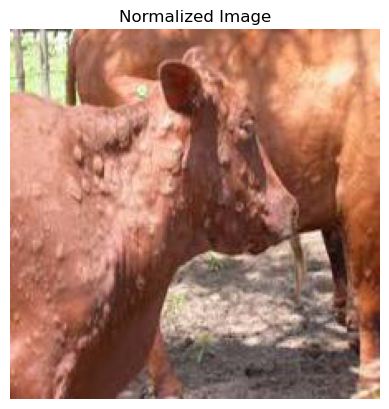

In [28]:
# Example Usage
img_path = "dataset\Train\Lumpy\img1023.jpg"
preprocessed_img = preprocess_and_normalize_image(img_path)

# Visualize the normalized image
if preprocessed_img is not None:
    plt.imshow(preprocessed_img)
    plt.title("Normalized Image")
    plt.axis("off")
    plt.show()

#### CHeking for pixels after Normalization

In [29]:
# Example Usage
img_path = "dataset\Train\Foot_and_mouth\mouth_5-7_days_2WM.jpg"
preprocessed_img = preprocess_and_normalize_image(img_path)

# Visualize the normalized image
if preprocessed_img is not None:
    # Visualize the image
    plt.imshow(preprocessed_img)
    plt.title("Normalized Image")
    plt.axis("off")
    plt.show()

    # Display pixel values (printing a small part of the image)
    print("Pixel Values After Normalization (Range [0.0, 1.0]):")
    print(preprocessed_img[0:5, 0:5])  # Print a small section of the image (first 5x5 pixels)


File not found: dataset\Train\Foot_and_mouth\mouth_5-7_days_2WM.jpg


### Splitting Data into Training, Validation, and Test Sets

In [30]:
import shutil
from sklearn.model_selection import train_test_split

In [31]:
classes = ["Foot_and_mouth", "Lumpy", "Normal"]

In [32]:
# Function to split the dataset into training and validation sets
def split_dataset(base_path, validation_split=0.2):
    for class_name in classes:
        class_train_path = os.path.join(base_path, 'Train', class_name)
        class_val_path = os.path.join(base_path, 'Validation', class_name)

        # Ensure validation folder exists for each class
        if not os.path.exists(class_val_path):
            os.makedirs(class_val_path)
        
        # List all image files in the class's train folder
        image_files = os.listdir(class_train_path)
        
        # Split the data into training and validation
        train_files, val_files = train_test_split(image_files, test_size=validation_split, random_state=42)

        # Move images to validation folder
        for file in val_files:
            shutil.move(os.path.join(class_train_path, file), os.path.join(class_val_path, file))  # Move to validation folder

In [33]:
#Example usage:
split_dataset('dataset', validation_split=0.2)

### MODEL TRAINING

In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [35]:
# Paths to the dataset directories
train_dir = 'dataset/Train'
validation_dir = 'dataset/Validation'
test_dir = 'dataset/Test'

In [36]:
# Set image size
img_size = (224, 224)

#### Step 1: Data Augmentation & Image Preprocessing

In [37]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize image pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)  # Only normalization for validation set
test_datagen = ImageDataGenerator(rescale=1./255)  # Only normalization for test set

#### Step 2: Load the Data

In [38]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'  # Since we have more than two classes
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

Found 337 images belonging to 3 classes.
Found 1167 images belonging to 3 classes.
Found 597 images belonging to 3 classes.


#### Step 3: Build the CNN Model

In [39]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

#### Step 4: Compile the Model

In [40]:
model.compile(
    loss='categorical_crossentropy',  # Multi-class classification loss
    optimizer='adam',  # Adam optimizer for efficient training
    metrics=['accuracy']  # Track accuracy during training
)

#### Step 5: Train the Model

In [41]:
import os

def check_classes(dataset_dir):
    for class_name in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_path):
            print(f"Found class: {class_name}")

# Check the classes in the Train, Validation, and Test directories
print("Classes in Train Directory:")
check_classes(train_dir)

print("\nClasses in Validation Directory:")
check_classes(validation_dir)

print("\nClasses in Test Directory:")
check_classes(test_dir)

Classes in Train Directory:
Found class: Foot_and_mouth
Found class: Lumpy
Found class: Normal

Classes in Validation Directory:
Found class: Foot_and_mouth
Found class: Lumpy
Found class: Normal

Classes in Test Directory:
Found class: Foot_and_mouth
Found class: Lumpy
Found class: Normal


In [42]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 16,  # Use smaller batch size
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 16
)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.4290 - loss: 1.7201 - val_accuracy: 0.5604 - val_loss: 0.8598
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5645 - loss: 0.8736 - val_accuracy: 0.6684 - val_loss: 0.8006
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6422 - loss: 0.7591 - val_accuracy: 0.6478 - val_loss: 0.7532
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.5899 - loss: 0.7538 - val_accuracy: 0.6118 - val_loss: 0.8069
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6315 - loss: 0.7850 - val_accuracy: 0.6761 - val_loss: 0.7205
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6717 - loss: 0.6956 - val_accuracy: 0.6718 - val_loss: 0.7394
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6906 - loss: 0.6913 - val_accuracy: 0.6787 - val_loss: 0.7267
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6756 - loss: 0.6698 - val_accuracy: 0.6829 - val_loss:

#### Step 6: Evaluate the Model

In [43]:

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 297ms/step - accuracy: 0.7026 - loss: 0.6646
Test Accuracy: 70.69%


In [44]:
# Retrieve training accuracy
train_acc = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]

# Retrieve validation accuracy
val_acc = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

Training Accuracy: 70.92%
Validation Accuracy: 71.38%


In [45]:
# Optionally, you can save the model for future use
model.save('foot_and_mouth_model.h5')

### Model Evaluation

In [46]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 277ms/step - accuracy: 0.6848 - loss: 0.7067
Test Accuracy: 70.69%


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
# Get true labels and predictions
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 319ms/step
Classification Report:
                precision    recall  f1-score   support

Foot_and_mouth       0.11      0.09      0.10        55
         Lumpy       0.26      0.25      0.26       178
        Normal       0.59      0.62      0.60       364

      accuracy                           0.46       597
     macro avg       0.32      0.32      0.32       597
  weighted avg       0.45      0.46      0.45       597



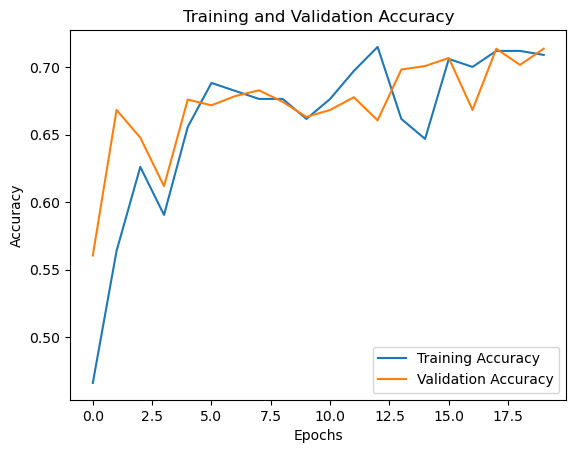

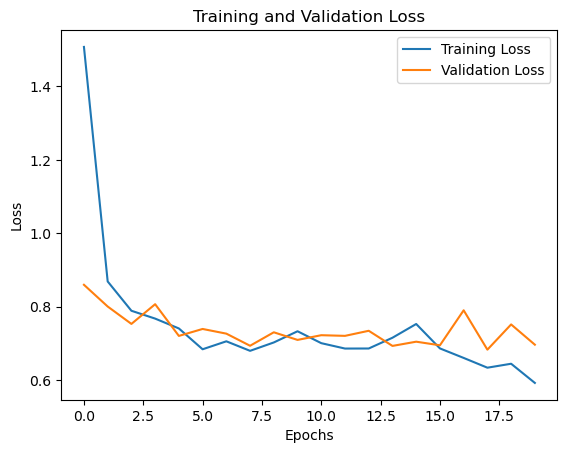

In [49]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

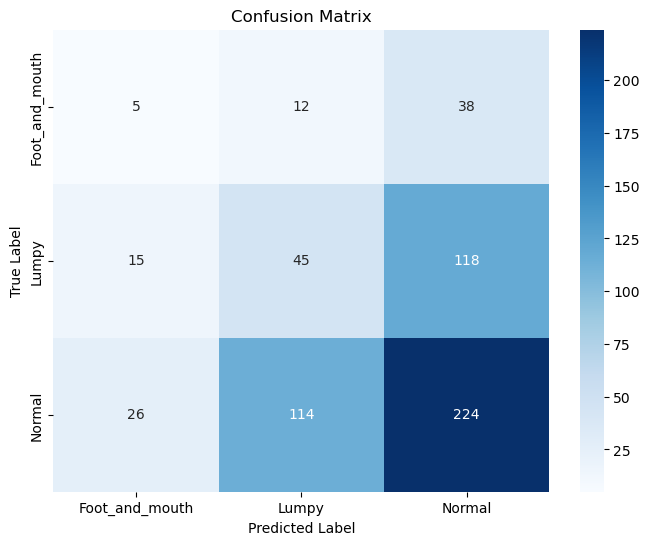

In [50]:
# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [51]:
from tensorflow.keras.optimizers import Adam

# Experiment with different learning rates
learning_rates = [0.01, 0.001, 0.0001]

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}\n")
    model.compile(optimizer=Adam(learning_rate=lr), loss="categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(train_generator, validation_data=validation_generator, epochs=5)  # Use fewer epochs for quick tuning



Training with learning rate: 0.01

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.4546 - loss: 14.0591 - val_accuracy: 0.5561 - val_loss: 1.2998
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.3884 - loss: 1.1756 - val_accuracy: 0.5536 - val_loss: 0.9243
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.5410 - loss: 0.9542 - val_accuracy: 0.5561 - val_loss: 0.9330
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.4883 - loss: 0.9937 - val_accuracy: 0.5561 - val_loss: 0.9289
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.4834 - loss: 0.9855 - val_accuracy: 0.5561 - val_loss: 0.9088

Training with learning rate: 0.001

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.5199 - loss: 0.9455 - val_accuracy: 0.5561 - val_loss: 0.9092
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.5049 - loss: 0.9609 - val_accuracy: 0.5561 - val_loss: 0.8947
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - 

### ROC Curves

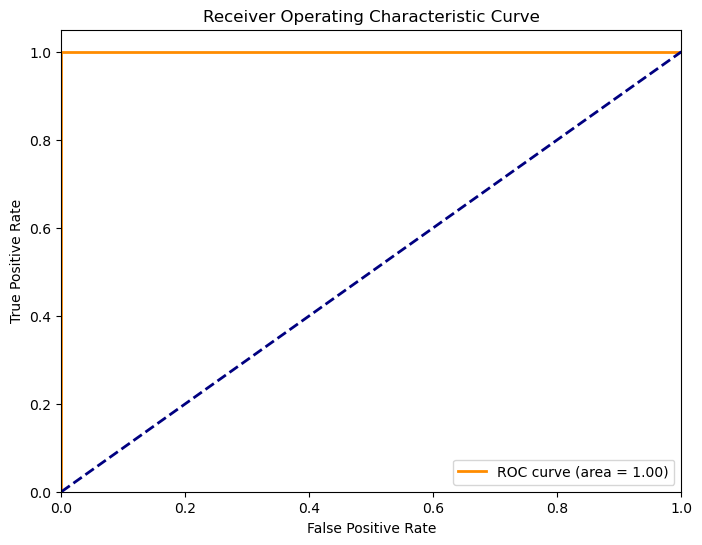

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# Example: Assuming you have the following data
# y_true: True labels (e.g., [0, 1, 2] for healthy, FMD, and LSD)
# y_pred: Predicted probabilities for each class (e.g., output from your model)

# If using multiclass classification, binarize the labels
y_true = [0, 1, 2, 1, 0, 2, 1]  # Replace with actual true labels
y_pred = [[0.8, 0.1, 0.1], [0.2, 0.7, 0.1], [0.1, 0.2, 0.7],  # Replace with actual predictions
          [0.1, 0.8, 0.1], [0.9, 0.05, 0.05], [0.2, 0.2, 0.6], [0.3, 0.5, 0.2]]

# Binarize the labels (for multiclass case)
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])  # Adjust for number of classes

# Calculate ROC curve for each class
fpr, tpr, _ = roc_curve(y_true_bin.ravel(), [p for pred in y_pred for p in pred])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()


###use case diagram

In [ ]:
import pygraphviz as pgv
from PIL import Image

# Create a new graph
G = pgv.AGraph(strict=False, directed=True)

# Add actors as nodes
G.add_node('Farmer', shape='ellipse', style='filled', fillcolor='lightblue', label='Farmer')
G.add_node('Veterinarian/Extension Officer', shape='ellipse', style='filled', fillcolor='lightgreen', label='Veterinarian/Extension Officer')
G.add_node('System Administrator', shape='ellipse', style='filled', fillcolor='lightyellow', label='System Administrator')

# Add use cases as nodes (ovals)
G.add_node('Capture/Upload Images', shape='ellipse', style='filled', fillcolor='lightgrey', label='Capture/Upload Images')
G.add_node('Receive Disease Diagnosis', shape='ellipse', style='filled', fillcolor='lightgrey', label='Receive Disease Diagnosis')
G.add_node('Access Health Records', shape='ellipse', style='filled', fillcolor='lightgrey', label='Access Health Records')
G.add_node('Receive Alerts & Notifications', shape='ellipse', style='filled', fillcolor='lightgrey', label='Receive Alerts & Notifications')
G.add_node('Monitor Outbreak Trends', shape='ellipse', style='filled', fillcolor='lightgrey', label='Monitor Outbreak Trends')
G.add_node('Manage Users & Data', shape='ellipse', style='filled', fillcolor='lightgrey', label='Manage Users & Data')

# Add edges to represent interactions between actors and use cases
G.add_edge('Farmer', 'Capture/Upload Images')
G.add_edge('Farmer', 'Receive Disease Diagnosis')
G.add_edge('Farmer', 'Access Health Records')
G.add_edge('Farmer', 'Receive Alerts & Notifications')

G.add_edge('Veterinarian/Extension Officer', 'Capture/Upload Images')
G.add_edge('Veterinarian/Extension Officer', 'Receive Disease Diagnosis')
G.add_edge('Veterinarian/Extension Officer', 'Monitor Outbreak Trends')

G.add_edge('System Administrator', 'Manage Users & Data')

# Customize the graph
G.graph_attr['rankdir'] = 'LR'  # Layout from left to right

# Render the graph to a file
G.draw('use_case_diagram.png', prog='dot', format='png')

# Open the generated image
img = Image.open('use_case_diagram.png')
img.show()


In [ ]:
pip install pygraphviz
